<a href="https://colab.research.google.com/github/Afzal786/Soft_Computing/blob/master/MIT2019072_SOC2020_ANN1_Assignment3_XNOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# class Perceptron consist of all the functions for the perceptron algo to function
class Perceptron(object):
    #initializing the weights, learning rate, epochs
    def __init__(self, input_size, lr=0.1, epochs=10000):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr
    # here the activation function used is if W.x + b >= 0 return 1 else 0
    def activation_fn(self, x):
        return 1 if x >= 0 else 0
    
    # This function predict the value of the particular dataset 
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    # This function runs the training of the network. 
    def fit(self, X, d):
        for _ in range(self.epochs): #runs the epochs
            for i in range(d.shape[0]): #runs through the number of data points in dataset
                x = np.insert(X[i], 0, 1) #adding bias at the begining of the data points
                y = self.predict(x) #predicting the value
                e = d[i] - y #calculating the error
                self.W = self.W + self.lr * e * x #modifying the weigths of the network.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#input set for AND && OR operation
X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
])

#input set for the NOT operation
X_not = np.array([[0],[1]])

# This section consist of y actual values of OR function, then initializing the perceptron to number of columns in dataset 
# and then running the perceptron algo
y_or = np.array([0, 1, 1, 1])
perceptron = Perceptron(input_size=2)
perceptron.fit(X, y_or)
w_or = perceptron.W.reshape(1,3)

#printing the weights obtained.
print("Weight Obtained for OR : {}".format(w_or))

# This section consist of y actual values of AND function, then initializing the perceptron to number of columns in dataset 
# and then running the perceptron algo
y_and = np.array([0, 0, 0, 1])
perceptron = Perceptron(input_size=2)
perceptron.fit(X, y_and)
w_and = perceptron.W.reshape(1,3)

#printing the weights obtained.
print("Weight Obtained for AND : {}".format(w_and))

# This section consist of y actual values of NOT function, then initializing the perceptron to number of columns in dataset 
# and then running the perceptron algo
y_not = np.array([1, 0])
perceptron = Perceptron(input_size=1)
perceptron.fit(X_not, y_not)
w_not = perceptron.W.reshape(1,2)

#printing the weights obtained.
print("Weight Obtained for NOT : {}".format(w_not))



Weight Obtained for OR : [[-0.1  0.1  0.1]]
Weight Obtained for AND : [[-0.2  0.2  0.1]]
Weight Obtained for NOT : [[ 0.  -0.1]]


In [0]:
def get_output(X_new,w):
  X_new = np.insert(X_new,0,1)

  y_pred = X_new@w.T
    
  #print(y_pred)
    
  for i in range(len(y_pred)):
    if y_pred[i] >= 0:
      y_pred[i] = 1
    else:
      y_pred[i] = 0

  y_pred = y_pred.reshape(len(y_pred),1)

  return y_pred


In [0]:
def XNOR_net(x):
    gate_1 = get_output(x,w_and)
    gate_2 = get_output(gate_1,w_not)
    gate_3 = get_output(x,w_or)
    new_x = np.array([gate_2, gate_3])
    gate4 = get_output(new_x,w_and)
    output = get_output(gate4,w_not)

    return output

In [0]:
y_output_xnor = np.zeros(4).reshape(4,1)
y_output_xnor[0] = XNOR_net(np.array([0,0]))
y_output_xnor[1] = XNOR_net(np.array([0,1]))
y_output_xnor[2] = XNOR_net(np.array([1,0]))
y_output_xnor[3] = XNOR_net(np.array([1,1]))



print(y_output_xnor)

[[1.]
 [0.]
 [0.]
 [1.]]


In [0]:
print("Output Predicted : \n")

data1  = np.vstack((X.T,y_output_xnor.T)).T

dataframe1 = pd.DataFrame(data=data1, columns=("1st_principal", "2nd_principal", "label"))


print(dataframe1.head(5))


Output Predicted : 

   1st_principal  2nd_principal  label
0            0.0            0.0    1.0
1            0.0            1.0    0.0
2            1.0            0.0    0.0
3            1.0            1.0    1.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


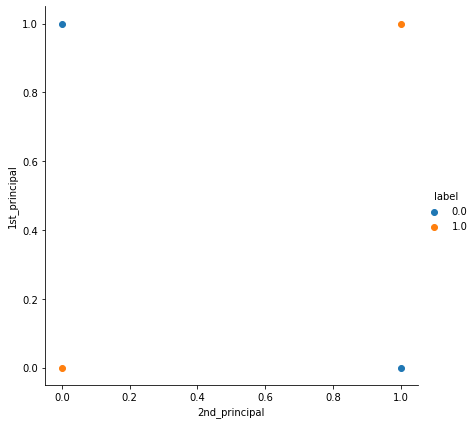

In [0]:

sns.FacetGrid(dataframe1, hue="label", size=6).map(plt.scatter, '2nd_principal', '1st_principal').add_legend()
plt.show()